<div style="display: flex; background-color: RGB(255,114,0);" >
<div>
<img src="img/fraudeur_-_BNPP_PF_-_finale.jpg" width="300"/>
</div>

# PROJET - Comment démasquer les fraudeurs ? <mark>EDA / Pré-processing</mark>
</div>

par BNP Paribas PF

Lien vers le challenge : https://challengedata.ens.fr/participants/challenges/104/

<div style="display: flex; background-color: Blue; padding: 15px;" >

## 1.CHARGEMENT des données
</div>


In [1]:
from os import getcwd
from os.path import join, exists
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from tqdm import tqdm
import csv
from IPython.core.display import HTML
import plotly.express as px
import plotly.graph_objs as go
from copy import deepcopy
from collections import defaultdict
import warnings
warnings.filterwarnings("ignore")

In [2]:
from bnp_paribas import *

In [3]:
# ---------------------------------------------------------------------------------------------
#                               MAIN
# ---------------------------------------------------------------------------------------------
verbose = 1

project_name = "projet_bnp_paribas_fraudeurs"
# Récupère le répertoire du programme
execution_path = getcwd().split("projet_")[0]
execution_path = join(execution_path, project_name)

data_set_path = join(execution_path, 'dataset')
data_set_x_train_file_name = join(data_set_path, "X_train_G3tdtEn.csv")
data_set_y_train_file_name = join(data_set_path, "Y_train_2_XPXJDyy.csv")
data_set_x_test_file_name = join(data_set_path, "X_test_8skS2ey.csv")

print(f"Current execution path : {execution_path}")
print(f"Dataset path : {data_set_path}")

Current execution path : c:\Users\User\WORK\workspace-ia\PROJETS\projet_bnp_paribas_fraudeurs
Dataset path : c:\Users\User\WORK\workspace-ia\PROJETS\projet_bnp_paribas_fraudeurs\dataset


In [4]:
x_train_origin = pd.read_csv(data_set_x_train_file_name, sep=',',low_memory=False)
y_train_origin = pd.read_csv(data_set_y_train_file_name, index_col='index', sep=',',low_memory=False)
x_test_origin = pd.read_csv(data_set_x_test_file_name, sep=',',low_memory=False)

print(f"{x_train_origin.shape} x_train données chargées")
print(f"{y_train_origin.shape} y_train données chargées")
print(f"{x_test_origin.shape} x_test données chargées")

(92790, 146) x_train données chargées
(92790, 2) y_train données chargées
(23198, 146) x_test données chargées


In [7]:
file_name_end= "_2023_02_13.csv"
origin_train_dataset_file_path = join(data_set_path, "train_dataset"+file_name_end)
origin_train_dataset_file_path

'c:\\Users\\User\\WORK\\workspace-ia\\PROJETS\\projet_bnp_paribas_fraudeurs\\dataset\\train_dataset_2023_02_13.csv'

<div style="display: flex; background-color: Blue; padding: 15px;" >

## 2.EDA
</div>


<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.1. Visualisation
</div>

In [8]:
x_train_origin

,ID,item1,item2,item3,item4,item5,item6,item7,item8,item9,...,Nbr_of_prod_purchas16,Nbr_of_prod_purchas17,Nbr_of_prod_purchas18,Nbr_of_prod_purchas19,Nbr_of_prod_purchas20,Nbr_of_prod_purchas21,Nbr_of_prod_purchas22,Nbr_of_prod_purchas23,Nbr_of_prod_purchas24,Nb_of_items
0,85517,COMPUTERS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,51113,COMPUTER PERIPHERALS ACCESSORIES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,83008,TELEVISIONS HOME CINEMA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,78712,COMPUTERS,COMPUTER PERIPHERALS ACCESSORIES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,77846,TELEVISIONS HOME CINEMA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92785,21243,COMPUTER PERIPHERALS ACCESSORIES,FULFILMENT CHARGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
92786,45891,COMPUTERS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
92787,42613,BEDROOM FURNITURE,BEDROOM FURNITURE,OUTDOOR FURNITURE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
92788,43567,COMPUTERS,COMPUTERS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [9]:
y_train_origin

,ID,fraud_flag
index,,
0,85517,0
1,51113,0
2,83008,0
3,78712,0
4,77846,0
...,...,...
92785,21243,0
92786,45891,0
92787,42613,0


<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.1. Pre-Processing => Nettoyage
</div>

Nettoyage : Après plusieurs visualisations, il s'avère que les items sont dupliqués, car ils ont des écritures différentes.
- à l'origine il y avait 173 items, après nettoyage => 162 items
- Application du même nettoyage aux autres données Object

Suppression de colonnes non utilisées :
- code des articles : 24 columns droped

In [10]:
dataset_train = pre_processing(X=x_train_origin, y=y_train_origin, save_file_path=origin_train_dataset_file_path, verbose=verbose)
dataset_train

[pre_processing]	INFO : 
both          92790
left_only         0
right_only        0
Name: _merge, dtype: int64


clean: 100%|██████████| 24/24 [00:03<00:00,  6.52it/s]


[pre_processing]	INFO : input (92790, 147)


Drop column: 100%|██████████| 24/24 [00:02<00:00, 11.93it/s]


[drop_numeroted_data_col]	INFO : 24 columns droped
[pre_processing]	INFO : output (92790, 123)
[pre_processing]	INFO: c:\Users\User\WORK\workspace-ia\PROJETS\projet_bnp_paribas_fraudeurs\dataset\train_dataset_2023_02_13.csv => SAVED


,ID,Nb_of_items,fraud_flag,item1,item2,item3,item4,item5,item6,item7,...,Nbr_of_prod_purchas15,Nbr_of_prod_purchas16,Nbr_of_prod_purchas17,Nbr_of_prod_purchas18,Nbr_of_prod_purchas19,Nbr_of_prod_purchas20,Nbr_of_prod_purchas21,Nbr_of_prod_purchas22,Nbr_of_prod_purchas23,Nbr_of_prod_purchas24
0,85517,1.0,0,COMPUTERS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,51113,1.0,0,COMPUTER PERIPHERALS ACCESSORIES,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,83008,1.0,0,TELEVISIONS HOME CINEMA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,78712,2.0,0,COMPUTERS,COMPUTER PERIPHERALS ACCESSORIES,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,77846,1.0,0,TELEVISIONS HOME CINEMA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92785,21243,2.0,0,COMPUTER PERIPHERALS ACCESSORIES,FULFILMENT CHARGE,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92786,45891,1.0,0,COMPUTERS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92787,42613,3.0,0,BEDROOM FURNITURE,BEDROOM FURNITURE,OUTDOOR FURNITURE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92788,43567,2.0,0,COMPUTERS,COMPUTERS,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
origin_test_dataset_file_path = join(data_set_path, "train_dataset"+file_name_end)
dataset_test = pre_processing(X=x_test_origin, y=None, save_file_path=origin_test_dataset_file_path, verbose=verbose)

clean: 100%|██████████| 24/24 [00:00<00:00, 25.72it/s]


[pre_processing]	INFO : input (23198, 146)


Drop column: 100%|██████████| 24/24 [00:00<00:00, 45.95it/s]


[drop_numeroted_data_col]	INFO : 24 columns droped
[pre_processing]	INFO : output (23198, 122)
[pre_processing]	INFO: c:\Users\User\WORK\workspace-ia\PROJETS\projet_bnp_paribas_fraudeurs\dataset\train_dataset_2023_02_13.csv => SAVED


In [12]:
print(f"NB = {nb_by_col(current_name='COMPUTERS', data_col_name='item', row=dataset_train.loc[78712], col_addition='Nbr_of_prod_purchas')}")
print(f"CASH PRICE = {nb_by_col(current_name='COMPUTERS', data_col_name='item', row=dataset_train.loc[78712], col_addition='cash_price')}")

NB = 1.0
CASH PRICE = 1399.0


<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.2. Exploration de la forme
</div>

<div style="display: flex; background-color: indigo;" >

#### 2.2.1. Type de données
</div>


In [13]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92790 entries, 0 to 92789
Columns: 123 entries, ID to Nbr_of_prod_purchas24
dtypes: float64(49), int64(2), object(72)
memory usage: 89.8+ MB


In [14]:
print(dataset_train.dtypes)

ID                         int64
Nb_of_items              float64
fraud_flag                 int64
item1                     object
item2                     object
                          ...   
Nbr_of_prod_purchas20    float64
Nbr_of_prod_purchas21    float64
Nbr_of_prod_purchas22    float64
Nbr_of_prod_purchas23    float64
Nbr_of_prod_purchas24    float64
Length: 123, dtype: object


In [7]:
for col in dataset_train.select_dtypes('object'):
    print(f"{col :-<50} {dataset_train[col].nunique()}")

item1--------------------------------------------- 130
item2--------------------------------------------- 134
item3--------------------------------------------- 122
item4--------------------------------------------- 122
item5--------------------------------------------- 105
item6--------------------------------------------- 96
item7--------------------------------------------- 90
item8--------------------------------------------- 88
item9--------------------------------------------- 82
item10-------------------------------------------- 71
item11-------------------------------------------- 70
item12-------------------------------------------- 62
item13-------------------------------------------- 60
item14-------------------------------------------- 57
item15-------------------------------------------- 55
item16-------------------------------------------- 44
item17-------------------------------------------- 46
item18-------------------------------------------- 41
item19-----------------

In [15]:
display(HTML(dataset_train.describe(include="all").to_html()))

,ID,Nb_of_items,fraud_flag,item1,item2,item3,item4,item5,item6,item7,item8,item9,item10,item11,item12,item13,item14,item15,item16,item17,item18,item19,item20,item21,item22,item23,item24,cash_price1,cash_price2,cash_price3,cash_price4,cash_price5,cash_price6,cash_price7,cash_price8,cash_price9,cash_price10,cash_price11,cash_price12,cash_price13,cash_price14,cash_price15,cash_price16,cash_price17,cash_price18,cash_price19,cash_price20,cash_price21,cash_price22,cash_price23,cash_price24,make1,make2,make3,make4,make5,make6,make7,make8,make9,make10,make11,make12,make13,make14,make15,make16,make17,make18,make19,make20,make21,make22,make23,make24,model1,model2,model3,model4,model5,model6,model7,model8,model9,model10,model11,model12,model13,model14,model15,model16,model17,model18,model19,model20,model21,model22,model23,model24,Nbr_of_prod_purchas1,Nbr_of_prod_purchas2,Nbr_of_prod_purchas3,Nbr_of_prod_purchas4,Nbr_of_prod_purchas5,Nbr_of_prod_purchas6,Nbr_of_prod_purchas7,Nbr_of_prod_purchas8,Nbr_of_prod_purchas9,Nbr_of_prod_purchas10,Nbr_of_prod_purchas11,Nbr_of_prod_purchas12,Nbr_of_prod_purchas13,Nbr_of_prod_purchas14,Nbr_of_prod_purchas15,Nbr_of_prod_purchas16,Nbr_of_prod_purchas17,Nbr_of_prod_purchas18,Nbr_of_prod_purchas19,Nbr_of_prod_purchas20,Nbr_of_prod_purchas21,Nbr_of_prod_purchas22,Nbr_of_prod_purchas23,Nbr_of_prod_purchas24
count,92790.000000,92790.000000,92790.000000,92790,44656,12901,4562,2170,1336,946,727,568,472,384,322,257,219,193,165,142,120,103,91,77,63,50,43,92790.000000,44656.000000,12901.000000,4562.000000,2170.00000,1336.000000,946.000000,727.000000,568.000000,472.00000,384.000000,322.000000,257.000000,219.000000,193.000000,165.000000,142.000000,120.000000,103.000000,91.000000,77.000000,63.000000,50.000000,43.000000,92105,44329,12791,4528,2151,1323,936,717,558,462,376,314,250,214,188,162,139,119,102,90,76,62,49,43,92105,44329,12791,4528,2151,1323,936,717,558,462,376,314,250,214,188,162,139,119,102,90,76,62,49,43,92790.000000,44656.000000,12901.000000,4562.000000,2170.000000,1336.000000,946.000000,727.000000,568.000000,472.000000,384.000000,322.000000,257.000000,219.000000,193.000000,165.000000,142.000000,120.000000,103.000000,91.000000,77.000000,63.000000,50.000000,43.000000
unique,NaN,NaN,NaN,130,134,122,122,105,96,90,88,82,71,70,62,60,57,55,44,46,41,37,33,30,24,22,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,424,415,357,308,265,205,186,165,142,126,107,100,81,73,69,61,49,42,44,37,30,23,25,19,3782,3242,2344,1610,1093,756,601,472,377,333,265,219,179,154,139,123,106,87,81,75,63,55,45,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,COMPUTERS,FULFILMENT CHARGE,FULFILMENT CHARGE,FULFILMENT CHARGE,FULFILMENT CHARGE,FULFILMENT CHARGE,BED LINEN,BED LINEN,BED LINEN,BED LINEN,BED LINEN,BED LINEN,BED LINEN,BED LINEN,BED LINEN,BED LINEN,BED LINEN,BED LINEN,BED LINEN,BED LINEN,BED LINEN,BED LINEN,BABYWEAR,BABYWEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,APPLE,RETAILER,RETAILER,RETAILER,RETAILER,RETAILER,RETAILER,RETAILER,RETAILER,RETAILER,RETAILER,RETAILER,RETAILER,RETAILER,RETAILER,RETAILER,RETAILER,RETAILER,RETAILER,RETAILER,RETAILER,RETAILER,RETAILER,RETAILER,020 APPLE MACBOOK AIR 13 3 RETINA DISPLAY M1 PROC,RETAILER,RETAILER,RETAILER,RETAILER,RETAILER,RETAILER,RETAILER,RETAILER,RETAILER,RETAILER,RETAILER,RETAILER,RETAILER,RETAILER,RETAILER,RETAILER,RETAILER,RETAILER,RETAILER,RETAILER,RETAILER,RETAILER,RETAILER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,47436,18015,4806,1256,388,189,118,97,77,57,40,36,33,32,19,24,21,16,16,12,9,8,6,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63868,31509,7593,2642,1136,682,443,308,230,198,174,139,107,97,75,59,47,55,36,35,33,23,20,19,12705,29415,6482,2035,766,432,265,192,138,108,92,88,60,52,43,36

<div style="display: flex; background-color: indigo;" >

#### 2.2.2. valeurs NA
</div>


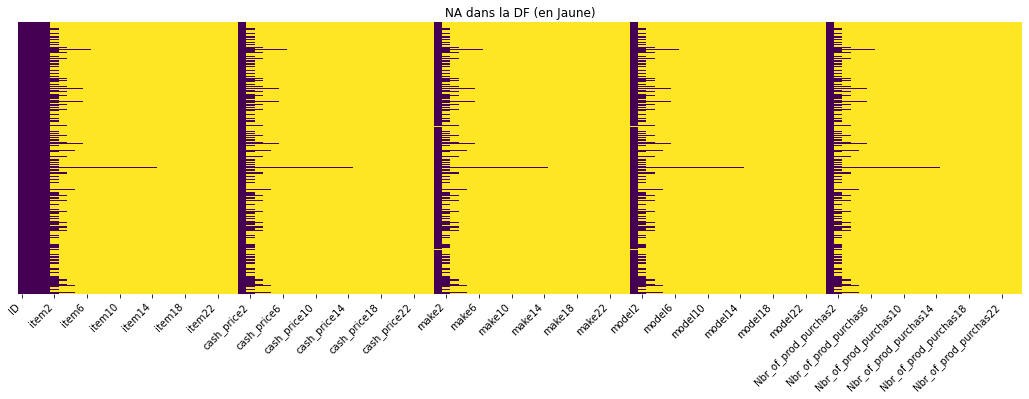

In [16]:
figure, ax = color_graph_background(1,1)
sns.heatmap(dataset_train.isnull(), yticklabels=False,cbar=False, cmap='viridis')
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.title("NA dans la DF (en Jaune)")
figure.set_size_inches(18, 5, forward=True)
plt.show()

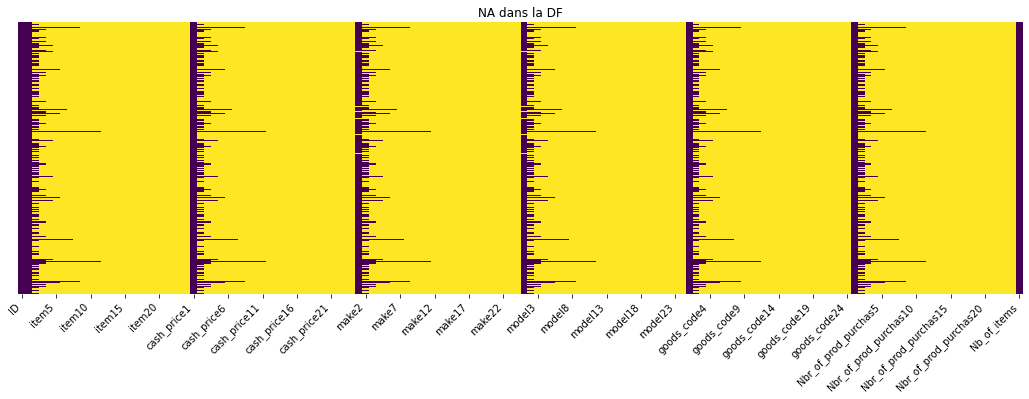

In [15]:
figure, ax = color_graph_background(1,1)
sns.heatmap(x_test_origin.isnull(), yticklabels=False,cbar=False, cmap='viridis')
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.title("NA dans la DF")
figure.set_size_inches(18, 5, forward=True)
plt.show()

<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.3. Exploration du fond
</div>

<div style="display: flex; background-color: indigo;" >

#### 2.3.0. Répartition des données
</div>

In [17]:
rate = round((dataset_train[dataset_train['fraud_flag']==1].shape[0]/dataset_train.shape[0])*100, 2)
print(f"Il y a {rate} % de fraude dans le train")

Il y a 1.42 % de fraude dans le train


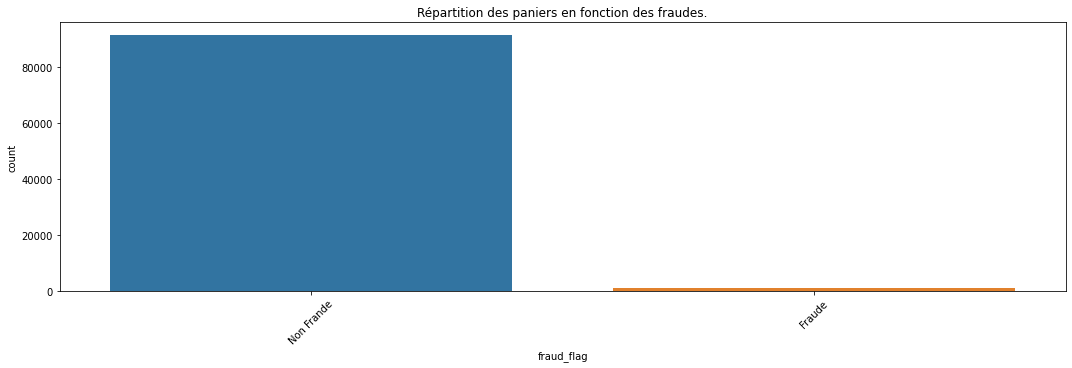

In [18]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(data=dataset_train, x='fraud_flag')
ax.set_xticklabels(['Non Frande', 'Fraude'], rotation=45, ha="center")
plt.tight_layout()
plt.title("Répartition des paniers en fonction des fraudes.")
plt.show()

Il y a une trop grande disparité dans les données, il faudra traiter cet écart pour que le modèle apprenne correctement...

<div style="display: flex; background-color: indigo;" >

#### 2.3.1. Corrélation
</div>

CORR ------------------
                         ID  Nb_of_items  fraud_flag  cash_price1  \
ID                     1.00        -0.07        0.02         0.08   
Nb_of_items           -0.07         1.00       -0.00        -0.12   
fraud_flag             0.02        -0.00        1.00         0.05   
cash_price1            0.08        -0.12        0.05         1.00   
cash_price2            0.08         0.09        0.01        -0.16   
cash_price3            0.06         0.05       -0.02        -0.13   
cash_price4            0.09         0.01       -0.00        -0.09   
cash_price5            0.04        -0.06        0.04        -0.03   
cash_price6            0.04        -0.08       -0.00        -0.01   
cash_price7            0.07        -0.06       -0.01        -0.05   
cash_price8            0.04        -0.09       -0.04        -0.06   
cash_price9            0.04        -0.07       -0.05        -0.01   
cash_price10           0.12        -0.04       -0.05         0.00   
cash_price

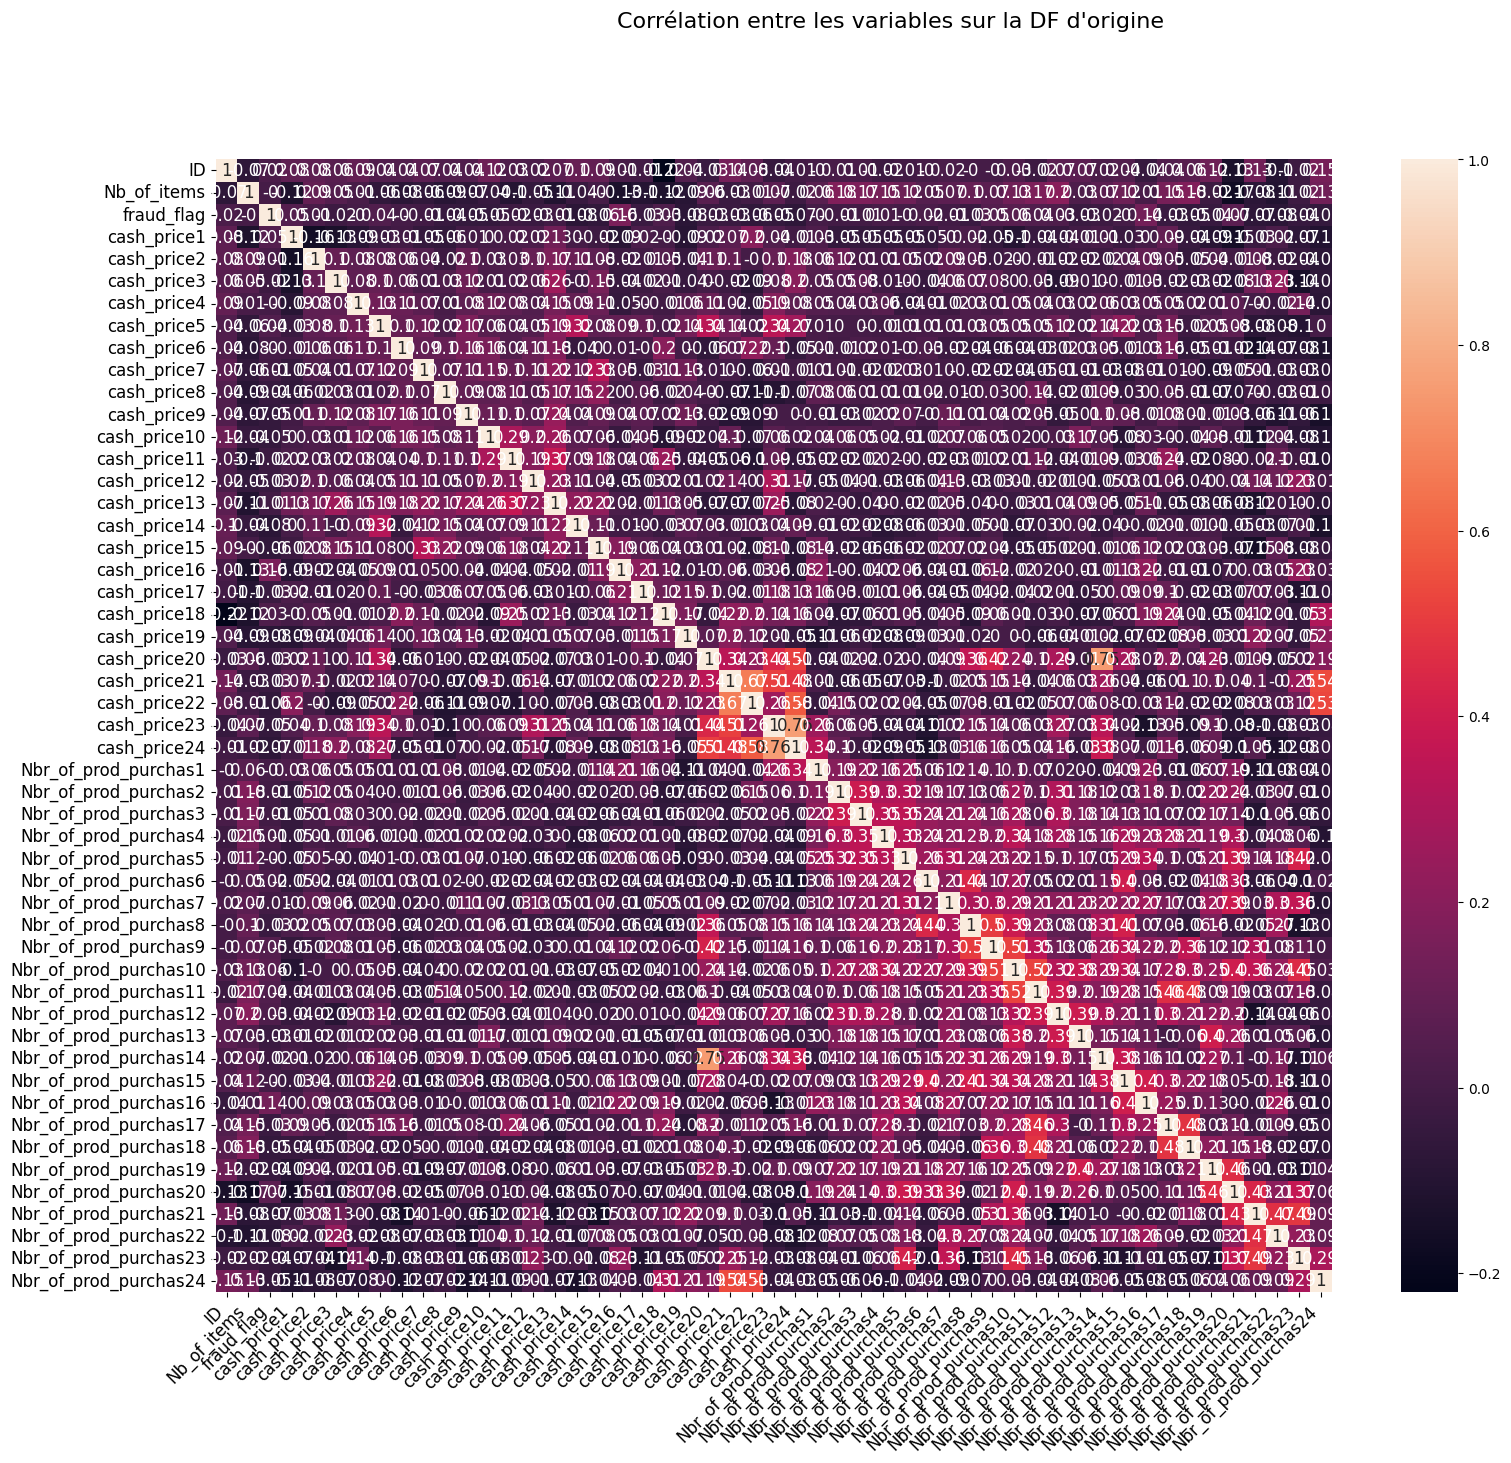

In [16]:
draw_correlation_graphe(dataset_train, "Corrélation entre les variables sur la DF d'origine", verbose=verbose)

> Le graphe de corrélation n'est pas lisible et ne semble pas très pertinent en l'état.


> De plus les lignes de panier n'ont logiquement pas de lien, sans compter qu'un item peut être dans des lignes différentes suivants les paniers ...  il faut donc réorganiser les données.

CORR ------------------
                        ID  Nb_of_items  fraud_flag  cash_price1  \
ID                    1.00        -0.07        0.02         0.08   
Nb_of_items          -0.07         1.00       -0.00        -0.12   
fraud_flag            0.02        -0.00        1.00         0.05   
cash_price1           0.08        -0.12        0.05         1.00   
Nbr_of_prod_purchas1 -0.00         0.06       -0.00         0.03   

                      Nbr_of_prod_purchas1  
ID                                   -0.00  
Nb_of_items                           0.06  
fraud_flag                           -0.00  
cash_price1                           0.03  
Nbr_of_prod_purchas1                  1.00   



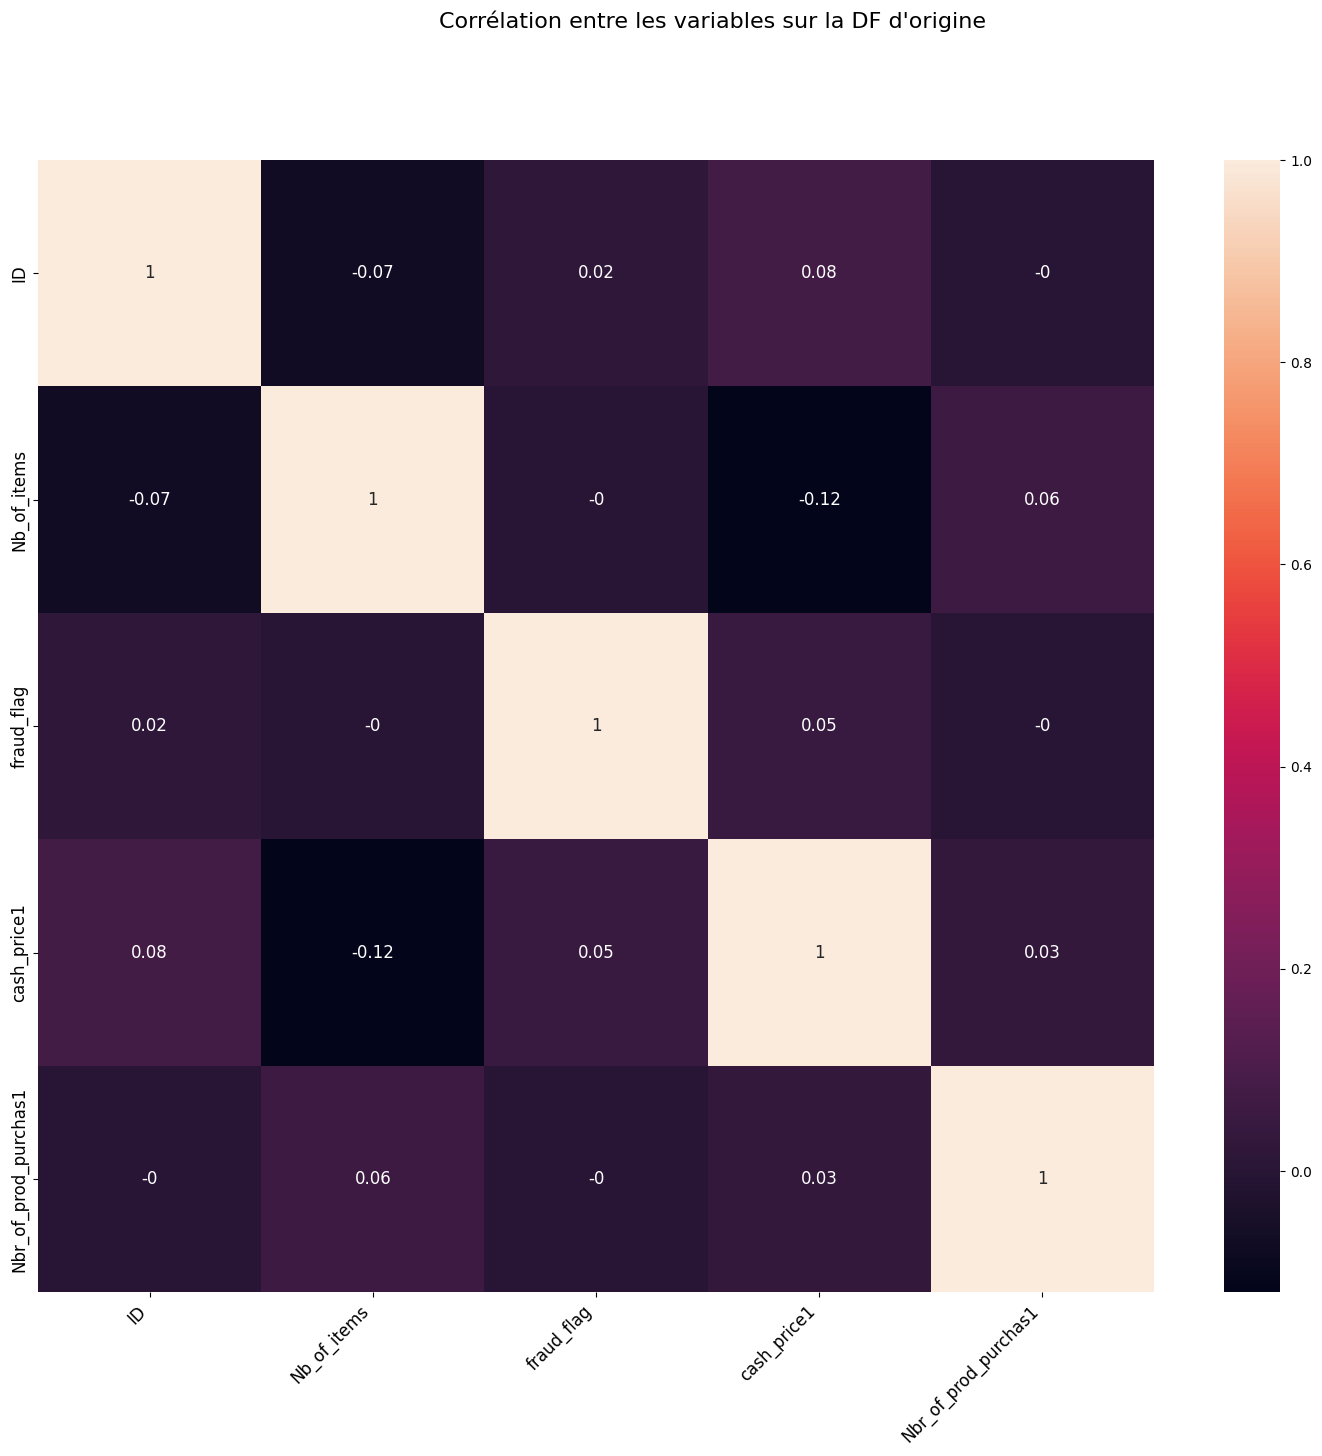

In [25]:
draw_correlation_graphe(dataset_train[['ID', 'Nb_of_items', 'fraud_flag', 'item1', 'cash_price1', 'Nbr_of_prod_purchas1']], "Corrélation entre les variables sur la DF d'origine", verbose=verbose,fontsize=12)

<div style="display: flex; background-color: indigo;" >

#### 2.3.2. Liste des items
</div>

Récupération de la liste des items pour en créer une catégorie

In [19]:
extract = dataset_train[dataset_train['item1']=='COMPUTERS']
# extract = extract[['ID', 'Nb_of_items', 'fraud_flag', 'item1', 'cash_price1', 'make1', 'model1', 'goods_code1', 'Nbr_of_prod_purchas1']]
display(HTML(extract.head().to_html()))

,ID,Nb_of_items,fraud_flag,item1,item2,item3,item4,item5,item6,item7,item8,item9,item10,item11,item12,item13,item14,item15,item16,item17,item18,item19,item20,item21,item22,item23,item24,cash_price1,cash_price2,cash_price3,cash_price4,cash_price5,cash_price6,cash_price7,cash_price8,cash_price9,cash_price10,cash_price11,cash_price12,cash_price13,cash_price14,cash_price15,cash_price16,cash_price17,cash_price18,cash_price19,cash_price20,cash_price21,cash_price22,cash_price23,cash_price24,make1,make2,make3,make4,make5,make6,make7,make8,make9,make10,make11,make12,make13,make14,make15,make16,make17,make18,make19,make20,make21,make22,make23,make24,model1,model2,model3,model4,model5,model6,model7,model8,model9,model10,model11,model12,model13,model14,model15,model16,model17,model18,model19,model20,model21,model22,model23,model24,Nbr_of_prod_purchas1,Nbr_of_prod_purchas2,Nbr_of_prod_purchas3,Nbr_of_prod_purchas4,Nbr_of_prod_purchas5,Nbr_of_prod_purchas6,Nbr_of_prod_purchas7,Nbr_of_prod_purchas8,Nbr_of_prod_purchas9,Nbr_of_prod_purchas10,Nbr_of_prod_purchas11,Nbr_of_prod_purchas12,Nbr_of_prod_purchas13,Nbr_of_prod_purchas14,Nbr_of_prod_purchas15,Nbr_of_prod_purchas16,Nbr_of_prod_purchas17,Nbr_of_prod_purchas18,Nbr_of_prod_purchas19,Nbr_of_prod_purchas20,Nbr_of_prod_purchas21,Nbr_of_prod_purchas22,Nbr_of_prod_purchas23,Nbr_of_prod_purchas24
0,85517,1.0,0,COMPUTERS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,889.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,APPLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,020 APPLE MACBOOK AIR 13 3 RETINA DISPLAY M1 PROC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,78712,2.0,0,COMPUTERS,COMPUTER PERIPHERALS ACCESSORIES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,689.0,119.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,APPLE,APPLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,020 APPLE IPAD AIR 10 9 A14 BIONIC PROCESSOR IOS,APPLE PENCIL 2ND GENERATION 2018 MATTE WHITE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,41798,1.0,0,COMPUTERS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1187.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,APPLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,020 APPLE MACBOOK PRO 13 TOUCH BAR M1 PROCESSOR 8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,83365,1.0,0,COMPUTERS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1899.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,APPLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,021 APPLE MACBOOK PRO 14 M1 PRO PROCESSOR 16GB RA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,39361,1.0,0,COMPUTERS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,898.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,APPLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,020 APPLE MACBOOK AIR 13 3 RETINA DISPLAY M1 PROC,NaN,NaN,NaN,N

<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.4. Encodage des données
</div>

<div style="display: flex; background-color: indigo;" >

#### 2.4.1. TRAIN
</div>

In [7]:
file_name= "train_complete_encoded_2023_01_19.csv"
# /!\ 50 min de traitement lors du forçage
# /!\ 306 min soit 5h de traitement lors du forçage ou 412 min soit 6h50
dataset_train_encoded = encode_data(data_set_path=data_set_path, df=dataset_train, file_name=file_name,force_reloading=0, verbose=verbose)
dataset_train_encoded

[encode_data]	INFO : STEP 1 => encoding ITEM to features about 30 min ... START
[encode_numeroted_data_to_features]	INFO: Conversion ITEM to feature... START


item_list: 100%|██████████| 162/162 [31:52<00:00, 11.81s/it]


[encode_numeroted_data_to_features]	INFO: Conversion ITEM to feature............ END
[encode_numeroted_data_to_features]	INFO : Drop item columns ... 


Drop column: 100%|██████████| 24/24 [00:02<00:00,  8.56it/s]


[drop_numeroted_data_col]	INFO : 24 columns droped


Drop column: 100%|██████████| 24/24 [00:07<00:00,  3.06it/s]


[drop_numeroted_data_col]	INFO : 96 columns droped
[encode_data]	INFO : STEP 2 => encoding MARK to features about 270 min soit 4h30 ... START
[encode_numeroted_data_to_features]	INFO: Conversion MAKE to feature... START


make_list: 100%|██████████| 827/827 [6:16:13<00:00, 27.30s/it]  


[encode_numeroted_data_to_features]	INFO: Conversion MAKE to feature............ END
[encode_numeroted_data_to_features]	INFO : Drop make columns ... 


Drop column: 100%|██████████| 24/24 [00:10<00:00,  2.36it/s]


[drop_numeroted_data_col]	INFO : 24 columns droped
[encode_data]	INFO : STEP 3 => Saving File ...


Drop column: 100%|██████████| 24/24 [00:28<00:00,  1.18s/it]


[drop_numeroted_data_col]	INFO : 72 columns droped
[encode_data]	INFO: train_complete_encoded_2023_01_19.csv => SAVED


,ID,Nb_of_items,fraud_flag,cash_price1,cash_price2,cash_price3,cash_price4,cash_price5,cash_price6,cash_price7,...,make_BLUEBELLA_nb,make_BLUEBELLA_cash,make_ROLSER_nb,make_ROLSER_cash,make_DARTINGTON CRYSTAL_nb,make_DARTINGTON CRYSTAL_cash,make_TEMPLE ISLAND_nb,make_TEMPLE ISLAND_cash,make_GHD_nb,make_GHD_cash
0,85517,1.0,0,889.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,51113,1.0,0,409.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,83008,1.0,0,1399.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,78712,2.0,0,689.0,119.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,77846,1.0,0,1199.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92785,21243,2.0,0,299.0,7.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92786,45891,1.0,0,898.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92787,42613,3.0,0,519.0,259.0,949.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92788,43567,2.0,0,1099.0,2099.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
file_name= "train_complete_encoded_2023_01_19.csv"
# /!\ 50 min de traitement lors du forçage
# /!\ 306 min soit 5h de traitement lors du forçage ou 412 min soit 6h50
dataset_train_encoded = encode_data(data_set_path=data_set_path, df=dataset_train, file_name=file_name,force_reloading=0, verbose=verbose)
dataset_train_encoded

[encode_data]	INFO: train_complete_encoded_2023_01_19.csv => Exist


,ID,Nb_of_items,fraud_flag,cash_price1,cash_price2,cash_price3,cash_price4,cash_price5,cash_price6,cash_price7,...,make_BLUEBELLA_nb,make_BLUEBELLA_cash,make_ROLSER_nb,make_ROLSER_cash,make_DARTINGTON CRYSTAL_nb,make_DARTINGTON CRYSTAL_cash,make_TEMPLE ISLAND_nb,make_TEMPLE ISLAND_cash,make_GHD_nb,make_GHD_cash
index,,,,,,,,,,,,,,,,,,,,,
0,85517,1.0,0,889.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,51113,1.0,0,409.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,83008,1.0,0,1399.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,78712,2.0,0,689.0,119.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,77846,1.0,0,1199.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92785,21243,2.0,0,299.0,7.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92786,45891,1.0,0,898.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92787,42613,3.0,0,519.0,259.0,949.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
print(dataset_train_encoded.shape)
dataset_train_encoded_light = drop_numeroted_data_col(df=dataset_train_encoded, cols_name=["cash_price", "make", "model", "Nbr_of_prod_purchas"], verbose=verbose)
print(dataset_train_encoded_light.shape)
dataset_train_encoded_light

(92790, 2053)


Drop column: 100%|██████████| 24/24 [00:37<00:00,  1.58s/it]

[drop_numeroted_data_col]	INFO : 72 columns droped
(92790, 1981)


,ID,Nb_of_items,fraud_flag,item_BED LINEN_nb,item_BED LINEN_cash,item_BATHROOM_nb,item_BATHROOM_cash,item_DISPOSABLE TABLEWARE CUTLERY_nb,item_DISPOSABLE TABLEWARE CUTLERY_cash,item_TOYS_nb,...,make_BLUEBELLA_nb,make_BLUEBELLA_cash,make_ROLSER_nb,make_ROLSER_cash,make_DARTINGTON CRYSTAL_nb,make_DARTINGTON CRYSTAL_cash,make_TEMPLE ISLAND_nb,make_TEMPLE ISLAND_cash,make_GHD_nb,make_GHD_cash
0,85517,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,51113,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,83008,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,78712,2.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,77846,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92785,21243,2.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92786,45891,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92787,42613,3.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92788,43567,2.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
file_name= join(data_set_path,"train_complete_encoded_hyper_light_2023_01_19.csv")
dataset_train_encoded_light.to_csv(file_name)

In [ ]:
def save_make_light(df, data_set_path, file_name="train_MAKE_light_2023_01_19.csv", verbose=0):
    cols = prefixed_cols(df=df, col_prefix="item_", verbose=verbose)
    
    df_light =df.copy()
    print(df_light.shape)
    df_light = df_light.drop(columns=cols)
    print(df_light.shape)
    file_name= join(data_set_path,file_name)
    df_light.to_csv(file_name)
    return df_light

In [ ]:
dataset_train_make_encode_light = save_make_light(df=dataset_train_encoded_light, data_set_path=data_set_path, file_name="train_MAKE_light_2023_01_19.csv", verbose=verbose)
dataset_train_make_encode_light

(92790, 1981)
324
(92790, 1657)


,ID,Nb_of_items,fraud_flag,make_LAMAZE_nb,make_LAMAZE_cash,make_ACER_nb,make_ACER_cash,make_POOLE POTTERY_nb,make_POOLE POTTERY_cash,make_LOGITECH_nb,...,make_BLUEBELLA_nb,make_BLUEBELLA_cash,make_ROLSER_nb,make_ROLSER_cash,make_DARTINGTON CRYSTAL_nb,make_DARTINGTON CRYSTAL_cash,make_TEMPLE ISLAND_nb,make_TEMPLE ISLAND_cash,make_GHD_nb,make_GHD_cash
0,85517,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,51113,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,83008,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,78712,2.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,77846,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92785,21243,2.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92786,45891,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92787,42613,3.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92788,43567,2.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
dataset_train_encoded_light["item_COMPUTERS_cash"].head()

0    889.0
1      0.0
2      0.0
3    689.0
4      0.0
Name: item_COMPUTERS_cash, dtype: float64

<div style="display: flex; background-color: indigo;" >

#### 2.4.2. TEST
</div>

In [24]:
# /!\ 50 min de traitement lors du forçage
# /!\ 306 min soit 5h de traitement lors du forçage ou 412 min soit 6h50
file_name= "test_complete_encoded_2023_01_19.csv"
dataset_test_encoded = encode_data(data_set_path=data_set_path, df=dataset_test, file_name=file_name,force_reloading=0, verbose=verbose)
dataset_test_encoded

[encode_data]	INFO : STEP 1 => encoding ITEM to features about 30 min ... START
[encode_numeroted_data_to_features]	INFO: Conversion ITEM to feature... START


item_list: 100%|██████████| 142/142 [09:14<00:00,  3.90s/it]


[encode_numeroted_data_to_features]	INFO: Conversion ITEM to feature............ END
[encode_numeroted_data_to_features]	INFO : Drop item columns ... 


Drop column: 100%|██████████| 24/24 [00:00<00:00, 31.63it/s]


[drop_numeroted_data_col]	INFO : 24 columns droped


Drop column: 100%|██████████| 24/24 [00:02<00:00,  9.49it/s]


[drop_numeroted_data_col]	INFO : 96 columns droped
[encode_data]	INFO : STEP 2 => encoding MARK to features about 270 min soit 4h30 ... START
[encode_numeroted_data_to_features]	INFO: Conversion MAKE to feature... START


make_list: 100%|██████████| 469/469 [42:58<00:00,  5.50s/it]


[encode_numeroted_data_to_features]	INFO: Conversion MAKE to feature............ END
[encode_numeroted_data_to_features]	INFO : Drop make columns ... 


Drop column: 100%|██████████| 24/24 [00:02<00:00, 10.33it/s]


[drop_numeroted_data_col]	INFO : 24 columns droped
[encode_data]	INFO : STEP 3 => Saving File ...


Drop column: 100%|██████████| 24/24 [00:05<00:00,  4.30it/s]


[drop_numeroted_data_col]	INFO : 72 columns droped
[encode_data]	INFO: test_complete_encoded_2023_01_19.csv => SAVED


,ID,cash_price1,cash_price2,cash_price3,cash_price4,cash_price5,cash_price6,cash_price7,cash_price8,cash_price9,...,make_G PLAN VINTAGE_nb,make_G PLAN VINTAGE_cash,make_DARTINGTON CRYSTAL_nb,make_DARTINGTON CRYSTAL_cash,make_TEMPLE ISLAND_nb,make_TEMPLE ISLAND_cash,make_BURGON BALL_nb,make_BURGON BALL_cash,make_GHD_nb,make_GHD_cash
0,64707,399.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,63919,294.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15664,929.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6626,539.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,26766,2470.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23193,63474,499.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23194,80438,1189.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23195,29485,1649.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23196,59838,369.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(dataset_test_encoded.shape)
dataset_test_encoded_light = drop_numeroted_data_col(df=dataset_test_encoded, cols_name=["cash_price", "make", "model", "Nbr_of_prod_purchas"], verbose=verbose)
print(dataset_test_encoded_light.shape)
dataset_test_encoded_light

In [ ]:
file_name= join(data_set_path,"test_complete_encoded_hyper_light_2023_01_19.csv")
dataset_test_encoded_light.to_csv(file_name)

In [ ]:
dataset_test_make_encode_light = save_make_light(df=dataset_test_encoded_light, data_set_path=data_set_path, file_name="test_MAKE_light_2023_01_19.csv", verbose=verbose)
dataset_test_make_encode_light